# Kmeans clustering & PCA of troop deployment strategies for fivethirtyeight's Battle for Riddler Nation

In [1]:
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("clean_comp_3_data.csv")

data

,Castle 1,Castle 2,Castle 3,Castle 4,Castle 5,Castle 6,Castle 7,Castle 8,Castle 9,Castle 10
0,2,2,2,2,6,18,2,28,36,2
1,1,1,1,11,19,27,37,1,1,1
2,2,3,4,5,6,22,6,22,22,8
3,2,2,4,6,6,10,11,14,17,28
4,1,1,2,3,16,22,1,1,33,20
...,...,...,...,...,...,...,...,...,...,...
1317,1,4,1,8,1,13,15,17,19,21
1318,0,0,0,18,18,2,2,2,34,24
1319,0,1,2,16,21,2,3,1,32,22
1320,0,0,3,3,16,6,16,21,4,31


# PCA on the strategies

**a) Extract Principal Components**

I will use the singular value decomposition approach to PCA, i.e. for the training set $X$ I will find orthogonal matrices $U$ annd $V$ and diagonal matrix $\Sigma$ such that 

$X = U \Sigma V^t$

In [3]:
U, S, Vh = np.linalg.svd(data.values)

get first two PCA components

In [4]:
pca_1 = Vh.T[:,1]

pca_2 = Vh.T[:,2]

In [5]:
pca_1

array([-0.01829892, -0.04577477, -0.05151041, -0.11906106, -0.18029797,
       -0.30574584, -0.47299398, -0.29982074,  0.43154794,  0.59573793])

In [6]:
pca_2

array([ 0.02334353,  0.04331419,  0.09516533,  0.09472104,  0.14418907,
        0.21358602,  0.07699316, -0.21017602, -0.68031193,  0.63262527])

# K-means cluster the strategies

In [7]:
def cluster_and_plot(k, data, pca_1, pca_2):
    kmeans = KMeans(n_clusters=k).fit(data)
    p_clusters = kmeans.predict(data)
    
    
    pca_1_proj = data.values.dot(pca_1)

    pca_2_proj = data.values.dot(pca_2)
    
    plot = plt.scatter(x = pca_1_proj, y = pca_2_proj, c = p_clusters)
    
    cluster_counts = np.unique(p_clusters, return_counts=True)[1]
    
    return plot, p_clusters, cluster_counts

(<matplotlib.collections.PathCollection at 0x11088f438>,
 array([1, 0, 1, ..., 2, 2, 2], dtype=int32),
 array([400, 290, 632]))

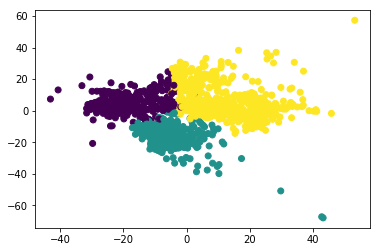

In [8]:
cluster_and_plot(3, data, pca_1, pca_2)

(<matplotlib.collections.PathCollection at 0x116ff30b8>,
 array([0, 2, 0, ..., 3, 1, 3], dtype=int32),
 array([285, 402, 328, 307]))

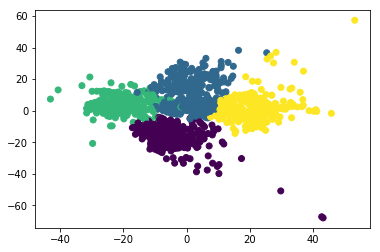

In [9]:
cluster_and_plot(4, data, pca_1, pca_2)

(<matplotlib.collections.PathCollection at 0x1170930b8>,
 array([2, 1, 2, ..., 0, 4, 3], dtype=int32),
 array([188, 326, 277, 147, 384]))

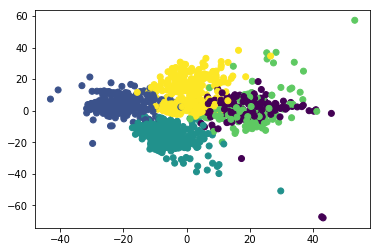

In [10]:
cluster_and_plot(5, data, pca_1, pca_2)

Going with k = 4 for now...

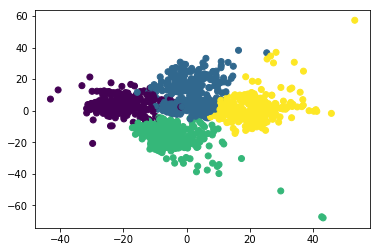

In [11]:
data_out = data

data_out["cluster"] = cluster_and_plot(4, data, pca_1, pca_2)[1]

data_out.to_csv("kmeans_clustered_strategies.csv")

In [12]:
data_out = pd.read_csv("kmeans_clustered_strategies.csv")

data_out = data_out.drop(columns = ["Unnamed: 0"]).sort_values(by = ["cluster"])

In [13]:
data_out.loc[data_out['cluster'] == 0].head()

,Castle 1,Castle 2,Castle 3,Castle 4,Castle 5,Castle 6,Castle 7,Castle 8,Castle 9,Castle 10,cluster
740,3,3,3,3,3,11,24,35,8,7,0
300,3,0,7,10,20,0,30,30,0,0,0
1133,4,8,12,15,19,22,4,5,5,6,0
297,1,3,7,17,17,18,22,5,6,4,0
1134,3,3,3,17,17,17,17,17,3,3,0


In [14]:
data_out.loc[data_out['cluster'] == 1].head()

,Castle 1,Castle 2,Castle 3,Castle 4,Castle 5,Castle 6,Castle 7,Castle 8,Castle 9,Castle 10,cluster
994,2,4,5,7,9,10,13,15,16,19,1
475,1,3,6,8,10,12,14,16,15,15,1
523,0,2,0,0,16,6,19,25,0,32,1
735,5,5,20,5,5,20,5,5,10,20,1
898,0,0,0,0,3,11,21,21,22,22,1


In [15]:
data_out.loc[data_out['cluster'] == 2].head()

,Castle 1,Castle 2,Castle 3,Castle 4,Castle 5,Castle 6,Castle 7,Castle 8,Castle 9,Castle 10,cluster
844,3,5,7,9,11,13,15,17,19,1,2
852,0,1,1,2,18,16,3,25,31,3,2
838,0,0,7,10,12,14,17,19,21,0,2
881,2,2,2,2,2,2,3,6,77,2,2
841,1,1,1,13,1,1,22,27,32,1,2


In [16]:
data_out.loc[data_out['cluster'] == 3].head()

,Castle 1,Castle 2,Castle 3,Castle 4,Castle 5,Castle 6,Castle 7,Castle 8,Castle 9,Castle 10,cluster
1233,0,0,0,16,21,1,2,1,35,24,3
1160,0,4,5,5,5,7,8,11,20,35,3
32,4,4,4,5,5,16,5,5,21,31,3
40,1,5,10,0,0,0,0,28,28,28,3
1149,0,2,3,4,15,22,1,2,31,20,3
